
# Analysing Palmer Penguins Data Set


***

![Palmer](img/penguins.png)

[Artwork by @allison_horst](https://allisonhorst.github.io/palmerpenguins/articles/art.html)

The data set is available [on GitHub](https://allisonhorst.github.io/palmerpenguins/).



## Introduction
***
This notebook contains my analysis of the famous palmer Palmer Penguins dataset. 

Palmer Penguins data set contains real-world body size measurements for three Pygoscelis penguin species that breed throughout the Western Antarctic Peninsula region, made available through the United States Long-Term Ecological Research (US LTER) Network. This data set is used as a great resource for study cases in statistics and data science education.[Source: 1]

The dataset contains data about 344 penguins collected between 2007 - 2009 by [Dr Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) and [The Palmer Station, Antarctica LTER](https://pallter.marine.rutgers.edu/) a member of the [Long Term Ecological Research Network](https://lternet.edu/).[Source: 2]

The dataset I'm using is called penguins.csv and its downloaded from [mwaskom/seaborn-data repository](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv). This file is an updated version of the original file and it's easier to read in python.
penguins.csv file is a coma separated values file - which is a text file that can be decoded using ASCII table. This means that each character in this file corresponds to a combination of 0's and 1's in the ASCII table. 
At the first look of the file we can see that each line in the file represents data about one single penguin and for each of them the information collected is:
- Species - the type of penguin.
- Island - the place where the penguins lived.
- bill_length_mm - penguin's bill length in mm.
- bill_depth_mm - penguin's bill length in mm.
- flipper_length_mm - penguin's flipper length in mm.
- body_mass_g - penguin's body mass in grams(g).
- sex - sex of penguin.

![bill length](img/bill_length.png)

[Artwork by @allison_horst](https://allisonhorst.github.io/palmerpenguins/)

## Imports

***

The following are the  libraries I will use to explore this dataset:
- pandas for the DataFrame data structure.
- matplotlib for plotting data.
- numpy for working with arrays
Theses libraries will allows us to investigate CSV files, amongst other features.

In [135]:
# Data frame.
import pandas as pd
# Plotting.
import matplotlib.pyplot as plt 
# Subplotting.
import seaborn as sns 
# Numerical arrays.
import numpy as np 
# Generating quick summaries.
from skimpy import skim

from tabulate import tabulate

***
## Overview of the dataset.
***


#### Load Data
***
Load the palmer penguins data set from a URL

In [136]:
# Load the penguins data set
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

The data is now loaded and we can inspect it. First we check that the file is loaded correctly

In [137]:
# Checking that the file is loaded correctly.
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


As we can see, from the data displayed above, this dataset has has 344 rows and 7 columns. Displayed is the header of the file, the first five rows and the last five rows. the dots in the middle tell us that more data is stored in this file.

## Inspect Data

***

Lets start by checking what data type is stored in this file.

In [138]:
# checking the data types.
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

From the above results we can see that:
 - bill_length_mm, bill_depth_mm, flipper_length_mm and body_mass_mm are all storing float64 data type, which is a double precision floating-point number format. This type of format occupies 64 bits in computer memory. 
 - Species, island and sex are storing object data type and can store any kind of data like strings of characters, numbers, lists etc... In this dataset they are storing strings.

I have decided to check the dataset if there are any null values and depending on the amount of them I can decide if I will use them in my analysis or remove them from the dataset.

In [139]:
# Here we check if there are any values missing in this dataset.
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

The values missing in this dataset are:

- 2 values in each of bill_length_mm, bill_depth_mm, flipper_length_mm and body_mass_g.
- 11 val missing in sex of penguins.

The number of rows with null values is 11. In my opinion if I remove the raws with null values from the dataset it will not affect the outcome of my analysis.
After removing null values I will run the same code again to check if the commands worked.

In [140]:
# removing the null values. [Source 3]
df.dropna(axis=0, inplace=True)

In [141]:
# Here we check again if there are still any values missing in the dataset.
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

As we can see from the output of the above command(df.isnull().sum()) there are no null values left in our dataset.
Using .info() function I can get a detailed info about the dataset. 

In [142]:
# Let's check the dataset again using .info function.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


Now our dataset is ready. We have 333 non-null entries in the dataset. In the first line we can see that dataframe 'df' is how holding 333 entries, 11 less than before. This because of all the null values removed before.

##### Other information we can get:

In [143]:
# Look at the first row 'iloc' means index location.
df.iloc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       MALE
Name: 0, dtype: object

In [144]:
# Sex of penguins
df['sex']


0        MALE
1      FEMALE
2      FEMALE
4      FEMALE
5        MALE
        ...  
338    FEMALE
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 333, dtype: object

In [145]:
# Count the number of penguins of each sex.
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

In the next section using df.describe() function we can get some statistical description of the data in the DataFrame:
- count - The number of not-empty values.
- mean - The average (mean) value.
- std - The standard deviation.
- min - the minimum value.
- 25% - The 25% percentile - how many of the values are less than 25%.
- 50% - The 50% percentile -  how many of the values are less than 50%.
- 75% - The 75% percentile -  how many of the values are less than 75%
- max - the maximum value. [Source 4]

In [146]:
# Describe the data set
penguins_table = df.describe()
penguins_table

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


Using 'skim' from skimpy library we can have a more detailed summary of the DataFrame.

In [147]:
# A detailed summary using skimpy
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 333    │ │ float64     │ 4     │                                                          │
│ │ Number of columns │ 7      │ │ string      │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name           ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ bill_length_mm        │   0 │      0 │   43.99 │   5.469 │  32.1 │  39.5 │  44.5 │  48.6 │  59.6 │  ▃▇▆▇▃  │  │
│ │ bill_depth_mm         │   0 │      0 │   17.16 │   1.969 │  13.1 │  15.6 │  17.3 │  18.7 │  21.5 │ ▃▅▆▇▆▁  │  │
│ │ flipper_length_mm     │   0 │      0 │     201 │   14.02 │   172 │   190 │   197 │   213 │   231 │ ▂▇▇▃▆▃  │  │
│ │ body_mass_g           │   0 │      0 │    4207 │   805.2 │  2700 │  3550 │  4050 │  4775 │  6300 │ ▂▇▆▅▃▁  │  │
│ └───────────────────────┴─────┴────────┴─────────┴─────────┴───────┴───────┴───────┴───────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ species                   │       0 │          0 │                            1 │                      333 │  │
│ │ island                    │       0 │          0 │                            1 │                      333 │  │
│ │ sex                       │       0 │          0 │                            1 │                      333 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

***
### Analyzing the DataFrame
***

First we can have a look at our numerical data. We can use plt.subplots from pyplot library here to create a two dimensional array of histograms representing each of our variables.

<Axes: xlabel='body_mass_g', ylabel='Count'>

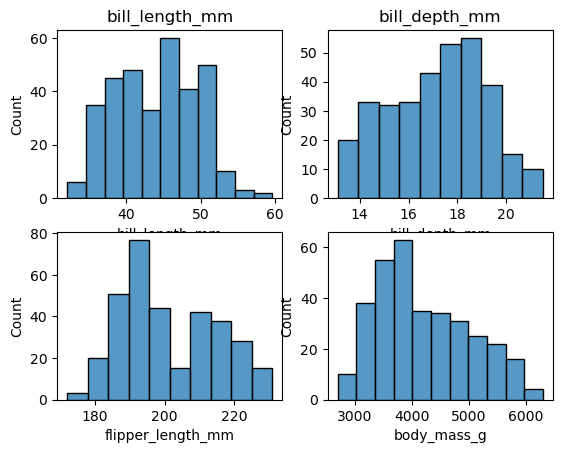

In [148]:
# Plotting the distribution of each quantitative(numerical) variable.
fig, axes = plt.subplots(2, 2)
sns.histplot(data=df, x='bill_length_mm', ax=axes[0,0]).set_title("bill_length_mm")
sns.histplot(data=df, x="bill_depth_mm", ax=axes[0,1]).set_title("bill_depth_mm")
sns.histplot(data=df, x="flipper_length_mm", ax=axes[1,0])
sns.histplot(data=df, x="body_mass_g", ax=axes[1,1])

Next I want to check how many penguins of each species are in each island.

We can check distribution of Penguins in each island in two ways:
- As a simple table using pandas library.
- or as a histogram using using seaborn library.

In [149]:
# Distribution of penguins in each island.
penguins_in_islands = pd.DataFrame(df.groupby(["island", "species"])['island'].count().rename('number'))
penguins_in_islands

number
island    species          
Biscoe    Adelie         44
          Gentoo        119
Dream     Adelie         55
          Chinstrap      68
Torgersen Adelie         47

Text(0.5, 1.0, 'Distribution of Penguins by Island')

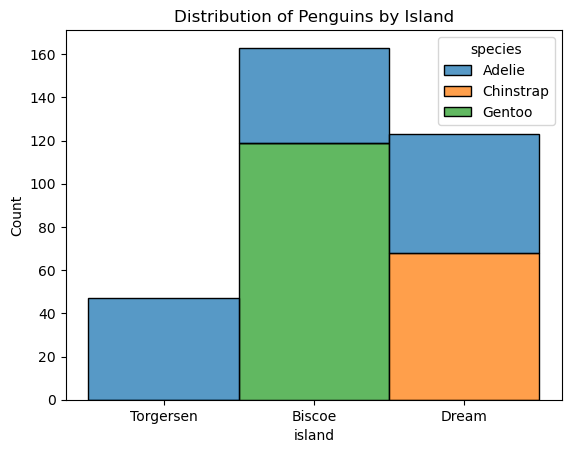

In [150]:
# Distribution of penguins in each island using a seaborn.
sns.histplot(data=df, x="island", hue="species", multiple="stack").set_title("Distribution of Penguins by Island")

In [151]:
body_mass_by_type = df.groupby('species')['body_mass_g'].mean()
body_mass_by_type

species
Adelie       3706.164384
Chinstrap    3733.088235
Gentoo       5092.436975
Name: body_mass_g, dtype: float64

Text(0.5, 1.0, 'Body mass by species')

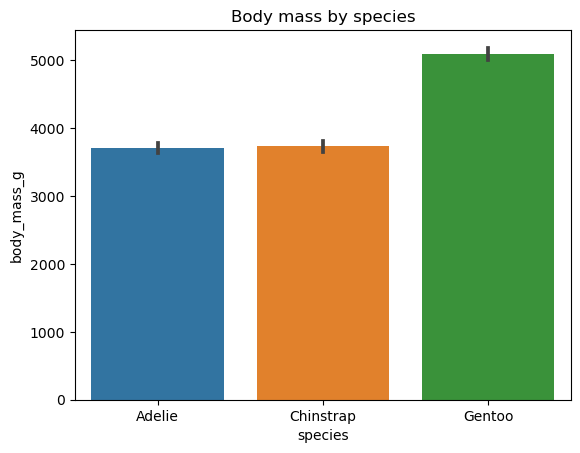

In [156]:
# Body mass and penguin type bar plot.
sns.barplot(data=df, x='species', y='body_mass_g').set_title("Body mass by species")

From the above data we can see that Adelie and Chinstrap penguins body mass are very close to each other and Gentoo penguins have a significant higher body mass.

In [ ]:
df.groupby('island')['body_mass_g'].mean()

island
Biscoe       4719.171779
Dream        3718.902439
Torgersen    3708.510638
Name: body_mass_g, dtype: float64

## Tables

***

|Species     |Bill Length  (mm)|Body Mass (g)|
|------------|----------------:|------------:|
|Adelie      |             38.8|         3701|
|Chinstrap   |             48.8|         3733|
|Gentoo      |             47.5|         5076|


## Math

***

$f(x) = x^2$

$\sum_{i=0}^{n-1} i$

$\bar{x} = \frac{\sum_{i=0}^{n-1} x_i}{n}$

## Reference:

- [Palmer Archipelago Penguins Data][1]

- [Palmer Penguins - Allison Horst](https://allisonhorst.github.io/palmerpenguins/)

[1]: https://journal.r-project.org/articles/RJ-2022-020/
- [Pandas-Parameters](https://www.w3schools.com/python/pandas/ref_df_dropna.asp)[3]
- [Pandas DataFrame describe()](https://www.w3schools.com/python/pandas/ref_df_describe.asp)[4]

***
## End
